# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
from gettext import install
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

645

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Build query URL
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = url + "appid=" + weather_api_key + "&units=imperial" + "&q=" 

In [11]:
counter = 0
clouds = []
country = []
date = []
humidity = []
latitude = []
longitude = []
max_temp = []
wind_speed = []
city_list = []

# Iterrows: loop cities in query_url
for city in cities:
    try:
        
        #update record number and set number
        if counter <= 499:
            response = requests.get(query_url + city).json()
            counter += 1
            city_lists =[*set()]
            clouds.append(response["clouds"]["all"])
            country.append(response["sys"]["country"])
            date.append(response["dt"])
            humidity.append(response["main"]["humidity"])
            latitude.append(response["coord"]["lat"])
            longitude.append(response["coord"]["lon"])
            max_temp.append(response["main"]["temp_max"])
            wind_speed.append(response["wind"]["speed"])
            city_list.append(city)
            print(f"{counter} | {city}")
    except Exception:
        print("City not found")

1 | busselton
2 | sioux lookout
3 | guerrero negro
City not found
5 | cidreira
6 | lamu
7 | saskylakh
8 | bredasdorp
9 | nikolskoye
10 | naze
11 | tasiilaq
12 | kruisfontein
13 | havelock
14 | sibolga
15 | khasan
City not found
17 | albany
18 | vila
19 | almansa
20 | kitimat
21 | east london
22 | matiguas
23 | north bend
24 | georgetown
25 | vanimo
26 | castro
27 | phan thiet
28 | boguchany
29 | sanming
30 | bhadrachalam
31 | jamestown
City not found
33 | katsuura
34 | koungou
35 | thompson
36 | severo-kurilsk
37 | cape town
38 | dikson
39 | butaritari
40 | asau
41 | svetlaya
42 | barrow
43 | jumla
44 | kimbe
45 | ostersund
46 | shubarshi
47 | nanortalik
48 | tuzha
49 | vaini
City not found
51 | arraial do cabo
52 | bitung
53 | sterling
54 | punta arenas
55 | new norfolk
56 | ushuaia
57 | poum
58 | bethel
59 | srednekolymsk
60 | luderitz
City not found
62 | kapaa
63 | denpasar
64 | saint-philippe
65 | rikitea
66 | kodiak
67 | doba
68 | clyde river
69 | edd
70 | bluff
71 | vostok
72 | p

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
cities_dict = ({"City": city_list,
               "Country": country,
               "Latitude": latitude,
               "Longitude": longitude,
               "Date": date,
               "Cloudiness": clouds,
               "Humidity": humidity,
               "Max Temp": max_temp,
               "Wind Speed": wind_speed})

In [13]:
#convert dictionary to dataframe
cities_df = pd.DataFrame(cities_dict)
cities_df.head()


,City,Country,Latitude,Longitude,Date,Cloudiness,Humidity,Max Temp,Wind Speed
0,busselton,AU,-33.6500,115.3333,1666736926,75,90,54.10,4.85
1,sioux lookout,CA,50.1001,-91.9170,1666736927,75,69,35.67,14.97
2,guerrero negro,MX,27.9769,-114.0611,1666737292,0,37,74.59,13.13
3,cidreira,BR,-30.1811,-50.2056,1666737293,0,81,66.13,20.38
4,lamu,KE,-2.2717,40.9020,1666737470,98,85,79.02,10.80


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [27]:
cities_df["Humidity"].describe()

count    459.000000
mean      72.202614
std       20.865872
min        5.000000
25%       61.500000
50%       78.000000
75%       88.000000
max      100.000000
Name: Humidity, dtype: float64

In [32]:
#  Get the indices of cities that have humidity over 100%.
humidity = cities_df[(cities_df["Humidity"] > 100)].index
humidity

Int64Index([], dtype='int64')

In [33]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = cities_df.drop(humidity, inplace=False)
clean_city_data

,City,Country,Latitude,Longitude,Date,Cloudiness,Humidity,Max Temp,Wind Speed
0,busselton,AU,-33.6500,115.3333,1666736926,75,90,54.10,4.85
1,sioux lookout,CA,50.1001,-91.9170,1666736927,75,69,35.67,14.97
2,guerrero negro,MX,27.9769,-114.0611,1666737292,0,37,74.59,13.13
3,cidreira,BR,-30.1811,-50.2056,1666737293,0,81,66.13,20.38
4,lamu,KE,-2.2717,40.9020,1666737470,98,85,79.02,10.80
...,...,...,...,...,...,...,...,...,...
454,fare,PF,-16.7000,-151.0167,1666737118,100,77,79.93,23.20
455,tuatapere,NZ,-46.1333,167.6833,1666737118,100,83,52.83,3.15
456,nisia floresta,BR,-6.0911,-35.2086,1666737118,56,77,79.61,8.08
457,hammerfest,NO,70.6634,23.6821,1666737118,0,74,30.65,0.00


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

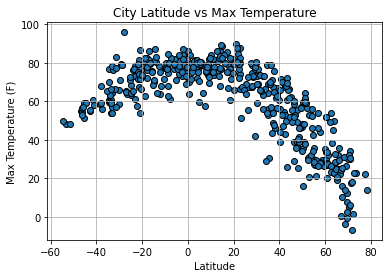

In [62]:
# Create a scatter plot for latitude vs max temperature.
x_values = clean_city_data["Latitude"]
y_values = clean_city_data["Max Temp"]


plt.scatter(x_values, y_values, edgecolor = "black", linewidth = 1, marker = "o")
plt.title(f"City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

# Save the figure
plt.savefig("./output_data/latitude_vs_max_temp.png", bbox_inches = "tight")
plt.show()

## Latitude vs. Humidity Plot

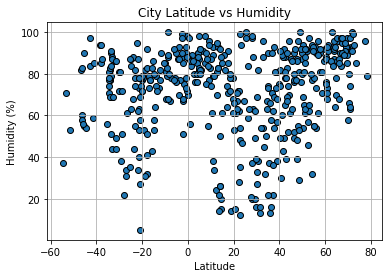

In [61]:
x_values = clean_city_data["Latitude"]
y_values = clean_city_data["Humidity"]

plt.scatter(x_values, y_values, edgecolor = "black", linewidth = 1, marker = "o")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity")
plt.grid()

# Save the figure
plt.savefig("./output_data/latitude_vs_humidity.png", bbox_inches = "tight")
plt.show()

## Latitude vs. Cloudiness Plot

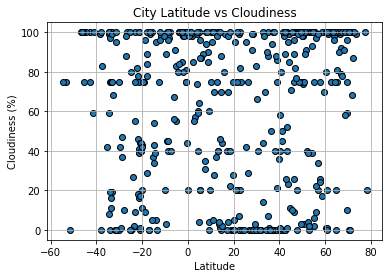

In [60]:
x_values = clean_city_data["Latitude"]
y_values = clean_city_data["Cloudiness"]

markersize=12
plt.scatter(x_values, y_values, edgecolor = "black", linewidth = 1, marker = "o")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness")
plt.grid()

# Save the figure
plt.savefig("./output_data/latitude_vs_cloudiness.png", bbox_inches = "tight")
plt.show()

## Latitude vs. Wind Speed Plot

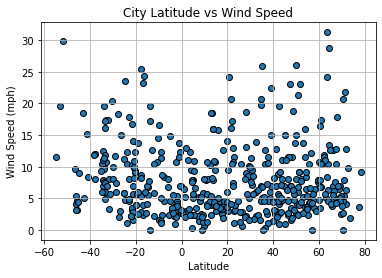

In [59]:
x_values = clean_city_data["Latitude"]
y_values = clean_city_data["Wind Speed"]

markersize = 12
plt.scatter(x_values, y_values, edgecolor = "black", linewidth = 1, marker = "o")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs Wind Speed")
plt.grid()

# Save the figure
plt.savefig("./output_data/latitude_vs_wind_speed.png", bbox_inches = "tight")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7402077437486387


NameError: name 'correlation' is not defined

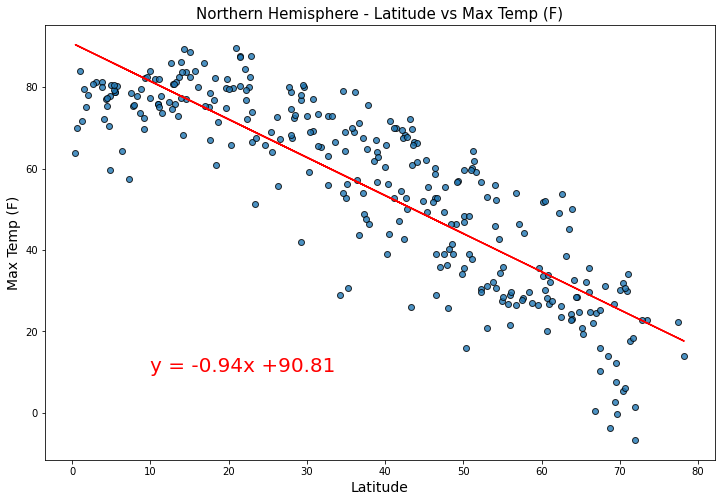

In [66]:
x_values = northern_hemi_weather_df["Latitude"]
y_values = northern_hemi_weather_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Latitude", "Max Temp (F)", "Northern", (10, 10))


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression